In [2]:
pip install yfinance

     -------------------------------------- 109.8/109.8 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 2.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 507.9/507.9 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 64.9/64.9 kB 3.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139127 sha256=ee7b5cc28a0f05e6e79dd0bfd17e01a0f43a10db63a6e8937780e9b4d9e62068
  Stored in directory: c:\users\ahmed hamed\appdata\local\pip\cache\wheels\95\bb\20\859b0853d3683815ccb6342d9ac5a49380a681c96285821184
Successfully built peewee
  Attempting uninstall: pytz
    Found 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

In [4]:
#Data Acquisition
ticker = 'AAPL'  
data = yf.download(ticker, start='2010-01-01', end='2020-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
#Data Preprocessing
# Selecting 'Close' price
data = data[['Close']]

# Handling missing values
data.dropna(inplace=True)

# Normalizing data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

C:\Users\AHMED HAMED\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\AHMED HAMED\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [6]:
# Creating sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # 60 days sequence
X, y = create_sequences(scaled_data, seq_length)

# Splitting data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [7]:
#Model Development
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, 1)),
    MaxPooling1D(pool_size=2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

In [8]:
#Model Training
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
62/62 [==============================] - 2s 15ms/step - loss: 0.0087 - val_loss: 0.0075
Epoch 2/50
62/62 [==============================] - 1s 12ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 3/50
62/62 [==============================] - 1s 13ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 4/50
62/62 [==============================] - 1s 11ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 5/50
62/62 [==============================] - 1s 13ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/50
62/62 [==============================] - 1s 11ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/50
62/62 [==============================] - 1s 11ms/step - loss: 9.7002e-04 - val_loss: 0.0016
Epoch 8/50
62/62 [==============================] - 1s 11ms/step - loss: 9.5034e-04 - val_loss: 0.0011
Epoch 9/50
62/62 [==============================] - 1s 12ms/step - loss: 9.0171e-04 - val_loss: 0.0010
Epoch 10/50
62/62 [==============================] - 1s 12ms/step - loss: 7.9941e-04 - val_loss: 

16/16 [==============================] - 0s 5ms/step - loss: 0.0031
Test MSE: 0.0030867508612573147
16/16 [==============================] - 0s 7ms/step


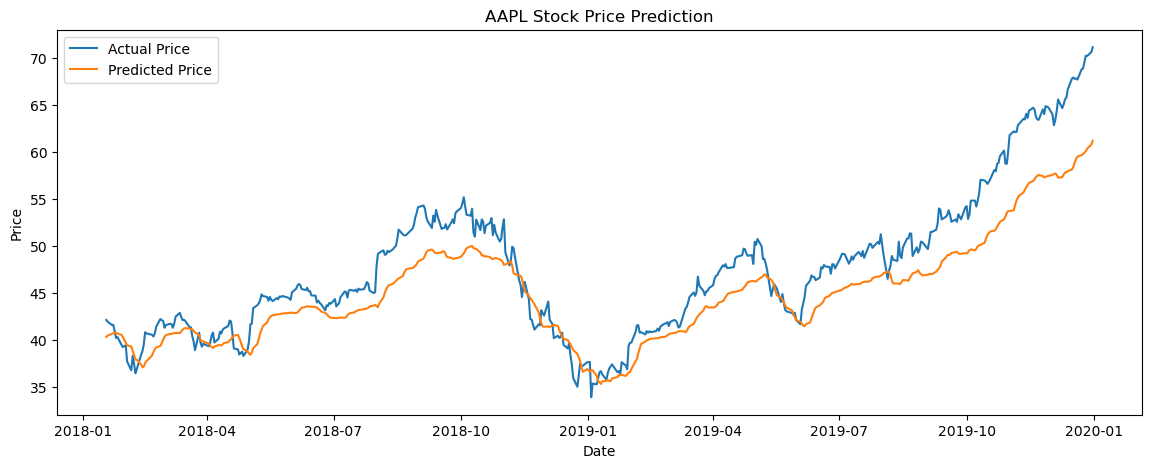

In [9]:
#Evaluation & Prediction
mse = model.evaluate(X_test, y_test)
print(f'Test MSE: {mse}')

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plotting results
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Price')
plt.plot(data.index[-len(predictions):], predictions, label='Predicted Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()